In [9]:
#write the linear regression hypothesis function in vector form
import numpy as np

def hypothesis(X, w):
    """
    Calculate the hypothesis for linear regression in vector form.

    Parameters:
    X (numpy array): The input feature matrix (m x n), where m is the number of examples, and n is the number of features including the bias term.
    w (numpy array): The weight vector (n x 1).

    Returns:
    numpy array: The predicted values.
    """
    return np.dot(X, w)

def mean_squared_error(y_true, y_pred):
    """
    Calculate the mean squared error, which is the loss function for linear regression.

    Parameters:
    y_true (numpy array): The true values.
    y_pred (numpy array): The predicted values.

    Returns:
    float: The mean squared error.
    """
    m = len(y_true)
    return (1/m) * np.sum((y_true - y_pred) ** 2)

def gradient_descent_step(X, y, w, learning_rate):
    """
    Perform one step of gradient descent.

    Parameters:
    X (numpy array): The input feature matrix.
    y (numpy array): The true values.
    w (numpy array): The current weight vector.
    learning_rate (float): The learning rate.

    Returns:
    numpy array: The updated weight vector.
    """
    m = len(y)
    y_pred = hypothesis(X, w)
    gradient = (1/m) * np.dot(X.T, (y_pred - y))
    w_updated = w - learning_rate * gradient
    return w_updated

def gradient_descent(X, y, w_initial, learning_rate, iterations):
    """
    Perform gradient descent to learn w.

    Parameters:
    X (numpy array): The input feature matrix.
    y (numpy array): The true values.
    w_initial (numpy array): The initial weight vector.
    learning_rate (float): The learning rate.
    iterations (int): The number of iterations.

    Returns:
    numpy array: The learned weight vector.
    list: The history of the cost function.
    """
    w = w_initial
    cost_history = []

    for i in range(iterations):
        w = gradient_descent_step(X, y, w, learning_rate)
        cost = mean_squared_error(y, hypothesis(X, w))
        cost_history.append(cost)

    return w, cost_history

In [10]:
import pandas as pd

# Reading the data from the CSV file
file_path = 'D:/Projects/Module 3/m3_h1/M3_H3/Housing.csv'
housing_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Optimal Weights (w):
Bias term: 4766523.46
Weight for Square Footage: 821199.27
Weight for Number of Bedrooms: 300296.29
Weight for Number of Bathrooms: 695516.00

Final Cost (Mean Squared Error): 1791170207770.23


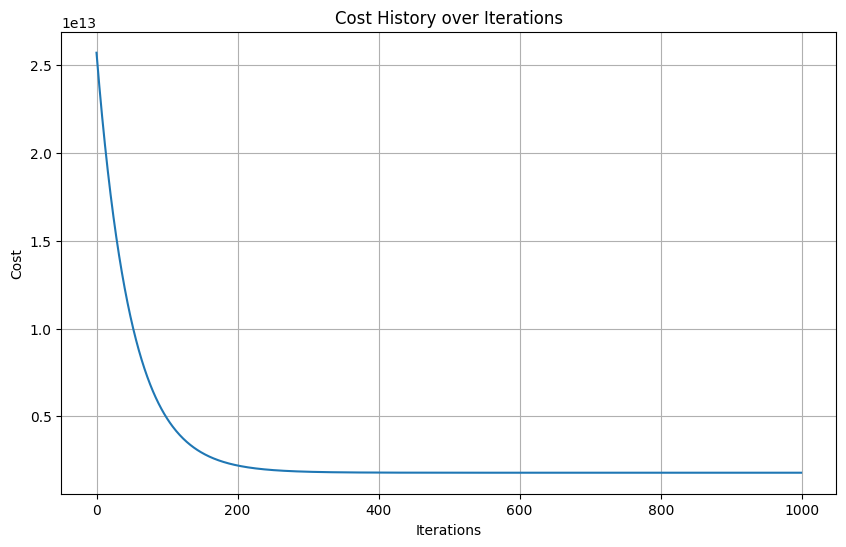

In [12]:
# Extracting relevant features and target variable
X = housing_data[['area', 'bedrooms', 'bathrooms']].values
y = housing_data['price'].values

# Normalizing the features
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

# Adding a bias term to the feature matrix
X_bias = np.hstack([np.ones((X_normalized.shape[0], 1)), X_normalized])

# Initial weight vector (starting with zeros)
w_initial = np.zeros(X_bias.shape[1])

# Preparing for gradient descent
learning_rate = 0.01
iterations = 1000

# Performing gradient descent
w_best, cost_history = gradient_descent(X_bias, y, w_initial, learning_rate, iterations)

w_best, cost_history[-1]  # Displaying the best weights and the final cost

import matplotlib.pyplot as plt

# Displaying the results in a more readable format
print("Optimal Weights (w):")
print("Bias term: {:.2f}".format(w_best[0]))
print("Weight for Square Footage: {:.2f}".format(w_best[1]))
print("Weight for Number of Bedrooms: {:.2f}".format(w_best[2]))
print("Weight for Number of Bathrooms: {:.2f}".format(w_best[3]))
print("\nFinal Cost (Mean Squared Error): {:.2f}".format(cost_history[-1]))

# Plotting the cost history
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title("Cost History over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

In [13]:
#find the same parameters using an analytical solution;
def normal_equation(X, y):
    """
    Compute the closed-form solution to linear regression using the normal equation.

    Parameters:
    X (numpy array): The input feature matrix.
    y (numpy array): The true values.

    Returns:
    numpy array: The weight vector calculated using the normal equation.
    """
    return np.linalg.pinv(X.T @ X) @ X.T @ y

# Calculating the weights using the normal equation
w_analytical = normal_equation(X_bias, y)

# Displaying the analytical solution weights
print("Analytical Solution Weights (w):")
print("Bias term: {:.2f}".format(w_analytical[0]))
print("Weight for Square Footage: {:.2f}".format(w_analytical[1]))
print("Weight for Number of Bedrooms: {:.2f}".format(w_analytical[2]))
print("Weight for Number of Bathrooms: {:.2f}".format(w_analytical[3]))


Analytical Solution Weights (w):
Bias term: 4766729.25
Weight for Square Footage: 821214.14
Weight for Number of Bedrooms: 299983.57
Weight for Number of Bathrooms: 695808.52


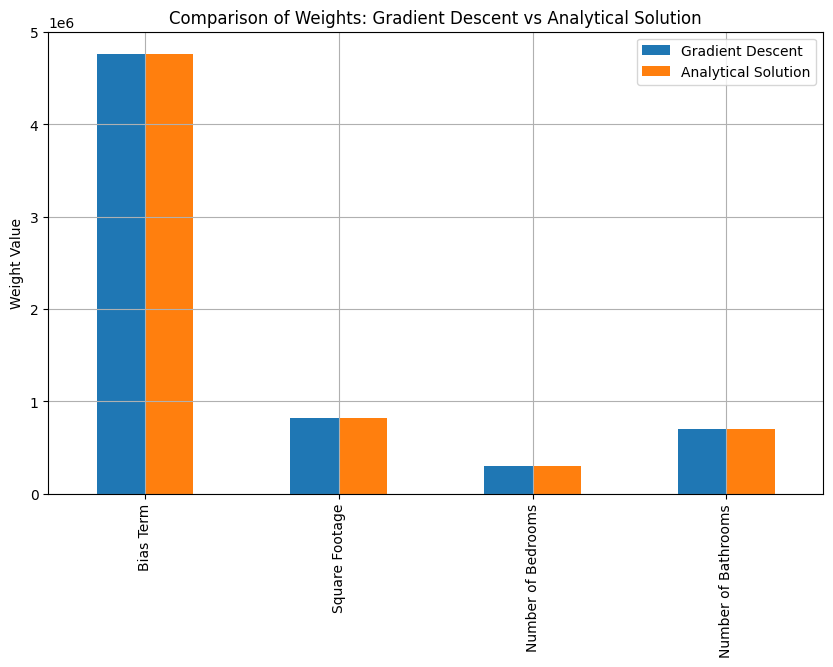

,Gradient Descent,Analytical Solution
Bias Term,4.766523e+06,4.766729e+06
Square Footage,8.211993e+05,8.212141e+05
Number of Bedrooms,3.002963e+05,2.999836e+05
Number of Bathrooms,6.955160e+05,6.958085e+05


In [14]:
# Displaying a side-by-side comparison of the results from Gradient Descent and Analytical Solution

comparison_data = {
    "Gradient Descent": w_best,
    "Analytical Solution": w_analytical
}

comparison_df = pd.DataFrame(comparison_data, index=["Bias Term", "Square Footage", "Number of Bedrooms", "Number of Bathrooms"])

# Plotting the comparison
comparison_df.plot(kind="bar", figsize=(10, 6))
plt.title("Comparison of Weights: Gradient Descent vs Analytical Solution")
plt.ylabel("Weight Value")
plt.grid(True)
plt.show()

# Displaying the comparison in tabular format
comparison_df
